In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [42]:
data = pd.read_csv('/home/khalana/GitRepos/project_zzzz/full_data.csv')

In [43]:
data['formatted_timestamp'] = data['timestamp'].apply(lambda x: datetime(int(x[:4]),int(x[5:7]),int(x[8:10]),int(x[11:13]), int(x[14:16]), int(x[17:19])))
data = data.sort_values('formatted_timestamp')

In [44]:
data.describe()

,Unnamed: 0,DustSensor,GasSensor,CO2Sensor,CO2Volts,temp
count,18858.000000,18858.000000,18858.000000,18858.000000,18858.000000,18858.000000
mean,9428.500000,956.162637,32.004719,468.484238,2.646405,24.325134
std,5443.980024,16.739133,1.700559,40.754873,0.125394,1.297759
min,0.000000,143.000000,22.000000,400.910675,2.177734,21.612358
25%,4714.250000,956.000000,31.000000,436.136993,2.509766,23.354050
50%,9428.500000,957.000000,32.000000,465.155853,2.656250,23.837078
75%,14142.750000,957.000000,33.000000,515.096985,2.739258,25.535393
max,18857.000000,960.000000,81.000000,580.211121,2.910156,28.045126


In [45]:
# data = data[['DustSensor','GasSensor','CO2Sensor','room']]
data['temp'] = data['CO2Sensor'].apply(lambda x: float(max(min(x*.05, 27),23.5) + np.random.normal(0,.5,1)))
corrData = data[['DustSensor','GasSensor','CO2Sensor','temp','room']]
corrData[corrData['room'] == 'nwc501'].corr()

,DustSensor,GasSensor,CO2Sensor,temp
DustSensor,1.000000,-0.002776,-0.001303,0.006305
GasSensor,-0.002776,1.000000,0.006226,-0.022371
CO2Sensor,-0.001303,0.006226,1.000000,0.825749
temp,0.006305,-0.022371,0.825749,1.000000


In [46]:
data['hour'] = data['formatted_timestamp'].apply(lambda x: x.hour)
data['day'] = data['formatted_timestamp'].apply(lambda x: x.day)
data['reading'] = np.array(range(len(data)))
data = data[data['CO2Sensor'] > 0 ]
data = data[data['CO2Sensor'] < 1000]

In [47]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 3
plt.rcParams["figure.figsize"] = fig_size

Current size: [8.0, 3.0]


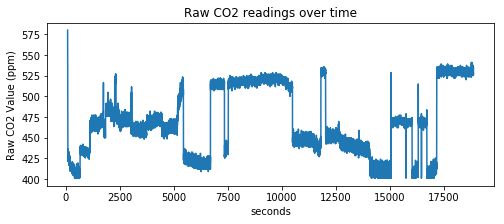

In [48]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
nwc501 = data[data['room'] == 'nwc501']
X = nwc501['reading']
Y = nwc501['CO2Sensor']
Y2 = nwc501['temp']
plt.plot(X,Y)
# plt.plot(X,Y2)
plt.ylabel("Raw CO2 Value (ppm)")
plt.xlabel("seconds")
plt.title("Raw CO2 readings over time")
plt.show()

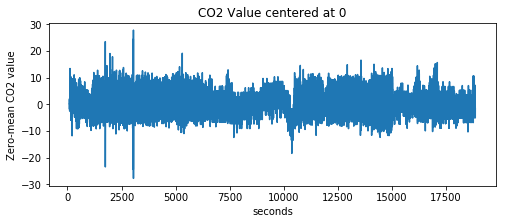

In [49]:

xstep = 2
eps = 10
indices = []
Y = np.array(Y)
for i,v in enumerate(Y[:-xstep]):
    dback = np.abs(v-Y[i-xstep])
    dahead = np.abs(Y[i+xstep]-v)
    if np.abs(dback - dahead) > eps:
        indices.append(i)

for i in range(len(indices)):
    start = indices[i]
    try:
        end = indices[i+1]
    except: 
        end = None
    Y[start:end] -= np.average(Y[start:end]) 
plt.ylabel("Zero-mean CO2 value")
plt.xlabel("seconds")
plt.title("CO2 Value centered at 0")
plt.plot(X,Y)

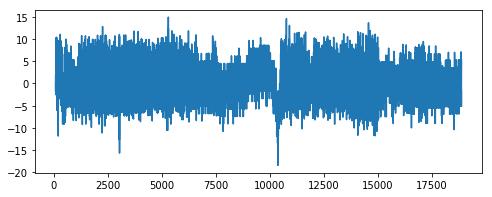

In [50]:
## Remove big spikes
for i in range(len(Y)-5):
    if abs(Y[i+3]-Y[i]) > 10:
#         print(Y[i])
        Y[i] = .5*(Y[i-3] + Y[i+3])
#         print(Y[i])
plt.plot(X,Y)

plt.show()

Text(0.5,1,'Denoised CO2 Value centered at 0')

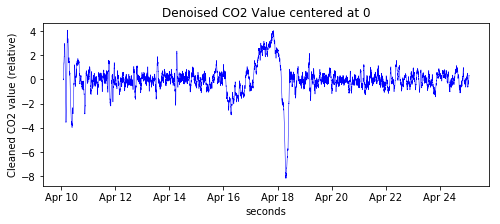

In [51]:
from scipy.signal import lfilter
fig, ax = plt.subplots()
n = 60  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
Yfilt = lfilter(b,a,Y)
plt.plot(X, Yfilt, linewidth=.5, linestyle="-", c="b")  # smooth by filter
labels = ['Apr 8', 'Apr 10','Apr 12','Apr 14','Apr 16','Apr 18', 'Apr 20', 'Apr 22', 'Apr 24', 'Apr 26']

ax.set_xticklabels(labels)
plt.ylabel("Cleaned CO2 value (relative)")
plt.xlabel("seconds")
plt.title("Denoised CO2 Value centered at 0")

# plt.xlim(7500,1000)

In [52]:
exam = data[data['formatted_timestamp'].apply(lambda x: x.day in [17]) == True]
exam = exam[exam['formatted_timestamp'].apply(lambda x: x.hour > 15) == True]

In [65]:
X = d['timestamp']
Y = d['CO2Sensor']

Text(0.5,1,'CO2 levels in NWC501 on April 17')

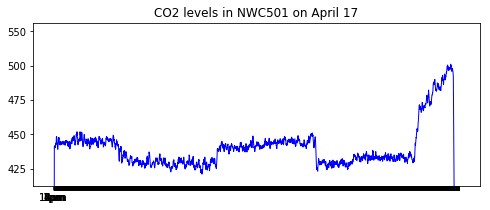

In [66]:
from scipy.signal import lfilter
fig, ax = plt.subplots()
n = 7  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
yy = lfilter(b,a,Y)-475
plt.plot(X, yy, linewidth=1, linestyle="-", c="b")  # smooth by filter
# plt.plot(temp)
plt.ylim(-30,65)

labels = ['11am','12pm','1pm','2pm','3pm','4pm','5pm','6pm','7pm','8pm']
ylabs = [400,425, 450, 475,500,550]
ax.set_xticklabels(labels)
ax.set_yticklabels(ylabs)
plt.title('CO2 levels in NWC501 on April 17')